In [ ]:
# Copyright (c) 2020-2021 CertifAI Sdn. Bhd.
# 
# This program is part of OSRFramework. You can redistribute it and/or modify
# it under the terms of the GNU Affero General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
# 
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Affero General Public License for more details.
# 
# You should have received a copy of the GNU Affero General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

# **1.0  Introduction to Linear Regression**

## 1.1  Linear Regression 
Linear regression is a linear approach to modelling the relationship between two or more continuous variables. When we have only one independent variable it is called simple linear regression. For more than one independent variable, the relationship is called multiple linear regression. 

*Note: In this tutorial, we will only be touching on simple linear regression model.*
## 1.2  Simple Linear Regression Model
Let *y* be the dependent variable and *x* be the independent variable. We will define a linear relationship between these two variables as follows:  

\\[ y = mx + c \\]  

Recall that this is the equation for a line that you studied in high school where *m* is the slope of the line and *c* is the y-intercept. In this tutorial, we will use this equation to train our model for a given dataset and predict the value of *y* for any given value of *x*. 

# **2.0  Linear Regression with Ordinary Least Squares (OLS)** 
  
To determine the value of our model parameters *m* and *c* which gives us the minimum error for the given dataset, we will first use the **Ordinary Least Squares** approach.  

## 2.1  Finding the Error 
We find the best fitting line for our data through minimizing the sum of squares of the vertical deviations from each data point to the line. Since the "deviations" are squared, then summed, there are no cancellations between positive and negative values. The error function can be defined as: 
  
\\[ L(x) = \sum_{i=1}^n (y_i - \hat{y}_i)^2\\]   
  
## 2.2  Ordinary Least Squares Method  
Now that we have determined the error function, the only thing left to do is to minimize it. This is done by finding the partial derivative of *L*, equating it to 0 and then finding an expression for *m* and *c*. After we do the math, we are left with these equations:    
  
\\[m = \frac{\sum_{i=1}^n (x_i - \hat x)(y_i - \hat y)}{\sum_{i=1}^n (x_i - \hat x)^2}\\]  
  
\\[c = \hat y - m\hat x\\]  
  
Here $\hat x$ is the mean of all the values in the input *x* and $\hat y$ is the mean of all the values in the desired output *y*. 
Now we will implement this in python code.  


## 2.3  Implementing the Model

Let's first import all the packages that you will need during this assignment.

- **numpy** is the main package for scientific computing with Python.
- **matplotlib** is a library to plot graphs in Python.
- **sklearn** features various algorithms of machine learning in Python.
- **pandas** is a high-level data manipulation tool in Python.

In [ ]:
# Making imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

Next, we load our input data using the pandas package. We then plot them on a scatter plot to show the relation between our two variables *x* and *y*. Upon inspection, it is clear that there exists a linear relation between our dependent and independent variable.

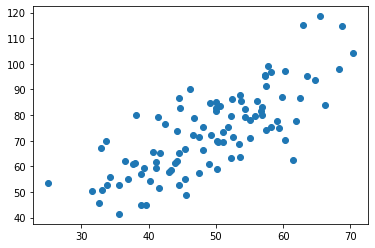

In [ ]:
# Preprocessing Input data
data = pd.read_csv('/content/data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

Now, we are ready to build our model in order to estimate our model parameters **m** and **c** which gives us the minimum error for the given dataset.

In [ ]:
# Building the model
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
#the for loop will iterate through all the rows in our dataset
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print (m, c)

1.287357370010931 9.908606190326509


Lastly, we plot our linear regression model using the parameter values that we obtained earlier along with the scatter plot our data.

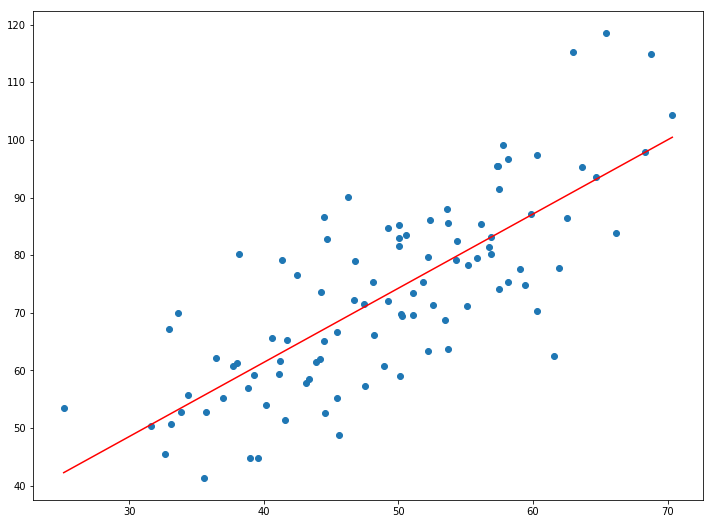

In [ ]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) # actual
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

# **3.0  Linear Regression with Gradient Descent** 

## 3.1 Understanding Gradient Descent
Unlike least squares method, gradient descent **finds the model parameters iteratively**. Gradient descent is an iterative algorithm that relies on gradient information to help direct the search for a minimum through optimizing our loss function.

Recall that, gradient descent perform these two steps iteratively:
*   Compute the gradient of the first order derivative of our loss function at that point
*   Make incremental steps in the direction opposite to the gradient and adjust the parameter values


## 3.2 Defining Our Loss Function
The loss is again the error of our predicted value from the actual value. Our goal is to minimize this loss to obtain values of *m* and *c* which gives us the best fitting line.  
We will use the **Mean Squared Error** function to calculate the loss. Thus, our loss function can be defined as:
\\[ L(x) = \frac{1}{n} \sum_{i=0}^n (y_i - \hat y_i)^2\\]  
Here $y_i$ is the actual value and $\hat y_i$ is the predicted value. Lets substitute the value of $\hat y_i$
\\[ L(x) = \frac{1}{n} \sum_{i=0}^n (y_i - (mx_i + c))^2\\]
Since we squared the error and find the mean, hence the name, Mean Squared Error.


## 3.3 Implementing Gradient Descent
1. Initially let m = 0 and c = 0. Let a be our learning rate in which the learning rate controls the step size we take to determine our next point. 
2. Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it.  
\\[ D_m = \frac{-2}{n} \sum_{i=0}^n x_i(y_i - (mx_i + c)) \\]
\\[ D_m = \frac{-2}{n} \sum_{i=0}^n x_i(y_i - \hat y_i) \\]  
Similarly, we find the partial derivative with respect to *c*, $D_c$ :  
\\[ D_c = \frac{-2}{n} \sum_{i=0}^n (y_i - \hat y_i) \\]
3. Now we update our parameter values using the following equation: 
\\[ m = m - a \times D_m\\]  
\\[ c = c - a \times D_c\\]  
4. We repeat this process untill our loss function is very small or ideally 0 (which however rarely be the case). The value that we obtained for *m* and *c* are the parameter values of our slope and y-intercept for our linear regression model.

## 3.4 Implementing the Model

Using the same dataset that we have earlier, we find the best fitting line for our simple linear regression model that fits the data best. That is, we find the parameters *m* and *b* using gradient descent.

Similarly, we extract the first column from our dataset into our independent variable, *X1* and the second column into our dependent variable, *Y1*. 

In [ ]:
# Preprocessing Input data
X1 = data.iloc[:, 0]
Y1 = data.iloc[:, 1]

We are now ready to build and train our linear regression model using the gradient descent approach.




In [ ]:
# Building the model
m1 = 0
c1 = 0

a = 0.0001  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent
n = float(len(X1)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y1_pred = m1*X1 + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X1 * (Y1 - Y1_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y1 - Y1_pred)  # Derivative wrt c
    m1 = m1 - a * D_m  # Update m
    c1 = c1 - a * D_c  # Update c
    
print (m1, c1)

1.287357370010932 0.025241304602481404


Lastly, we plot our linear regression model along with the scatter plots using the parameters we obtained for our slope and y-intercept respectively.

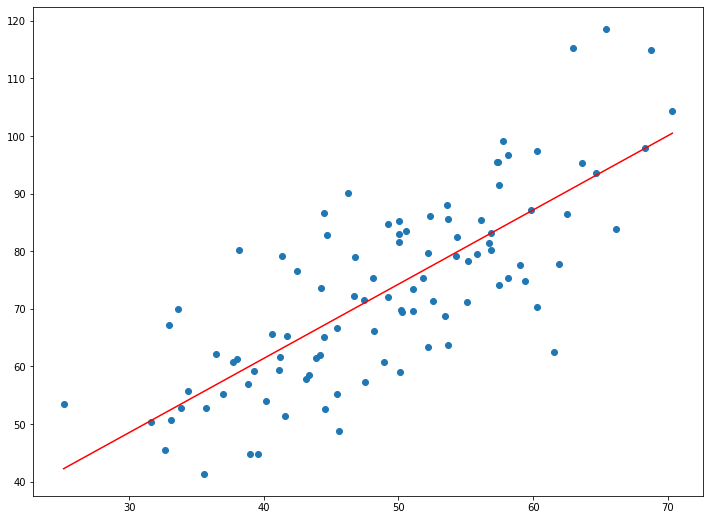

In [ ]:
# Making predictions
Y1_pred = m*X1 + c

plt.scatter(X1, Y1)
plt.plot([min(X1), max(X1)], [min(Y1_pred), max(Y1_pred)], color='red') # predicted
plt.show()

# **Exercises**

Using least squares and gradient descent approach, find the regression parameters *m* and *b* which gives us the best fitting line for our linear regression model for the "SATvsGPA.csv" dataset.

Answer:

In [ ]:
#Insert your codes here

Source: [Machine Learning Algorithms Implemented in Python from Scratch by ChasingInfinity](https://github.com/chasinginfinity/ml-from-scratch)